In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

In [3]:
n = 25
domX = np.linspace(-4,4,n)
domY = domX.copy()

In [4]:
v = 2
r = 2

In [5]:
x = sym.Symbol("x",Real=True)
y = sym.Symbol("y",Real=True)
p = x*v*(1-(r**2/(x**2+y**2)))
phi = sym.lambdify([x,y],p,"numpy")

In [6]:
p

2*x*(1 - 4/(x**2 + y**2))

In [7]:
def Dx(f,x,y,h):
    return (f(x+h,y)-f(x-h,y))/(2*h)

def Dy(f,x,y,h):
    return (f(x,y+h)-f(x,y-h))/(2*h)

In [32]:
def getVelocities(domX,domY):
    Ex = np.zeros((n,n))
    Ey = np.zeros((n,n))
    
    for i in range(0,n):
        for j in range (0,n):
            if not ((domX[i]**2 + domY[j]**2) <=4):
                Ex[i,j] = Dx(phi,domX[i],domY[j],h=0.001)
                Ey[i,j] = -Dy(phi,domX[i],domY[j],h=0.001)

    return Ex,Ey

<IPython.core.display.Javascript object>


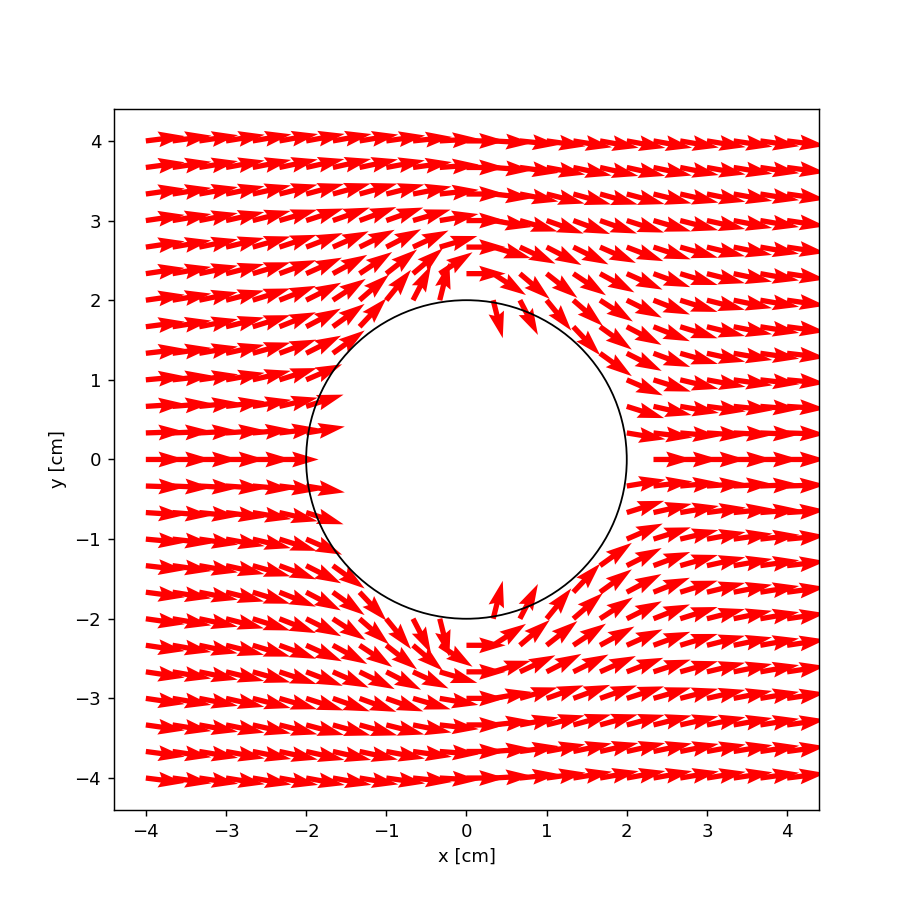

Text(0, 0.5, 'y [cm]')

In [35]:
vx,vy = getVelocities(domX,domY)

fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot()
for i in range(0,domX.size):
    for j in range(0,domY.size):
        ax.quiver(domX[i],domY[j],vx[i,j],vy[i,j],color="r")
draw_circle = plt.Circle((0, 0), 2,fill=False)
ax.add_artist(draw_circle)
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")